# **Prova del 28 Gennaio 2025**

## Quesito 1
Uno studente trova scritti su un foglio i seguenti dati

| X | 1213 | 1518 | 1550 | 1215 | 2120 | 2207 |
| --- | --- | --- | --- | --- |--- | --- | 
| Y | 15474 | 16497 | 17224 | 14459 | 22186 | 23483 |

e vuole capire se sono correlati

*a) Stabilire se tra i dati X e i dati Y c'è correlazione*

*b) Usare il metodo dei minimi quadrati per determinare la retta di regressione. In un plot mostrare i dati e la retta ricavata.*

*c) Calcolare il coefficiente di determinazione e commentare il risultato.*

Guardando meglio lo studente si accorge che mancavano alcuni dati e che la tabella completa era

| X | 1213 | 1518 | 3050 | 852 | 1550 | 1215 | 2120 | 2207 | 2175 | 1128 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Y | 15474 | 16497 | 29349 | 11314 | 17224 | 14459 | 22186 | 23483 | 24095 | 13982 |

*d) Usare il metodo dei minimi quadati per determinare la retta di regressione e confrontarla con la precedente. Com'è cambiato il risultato?*


In [ ]:
import numpy as np


def var(X):
    sum = 0;
    mean = np.mean(X)

    for x in X:
        sum += (x - mean)**2
    return sum/len(X)

def cov(X,Y):
    sum = 0;
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    for i in range(len(X)):
        sum += (X[i] - mean_X)*(Y[i] - mean_Y)
    return sum/len(X)


X = [1213, 1518, 1550, 1215, 2120, 2207]
Y = [15474, 16497, 17224, 14459, 22186, 23483]

# ESERCIZIO A: Stabilire se tra i dati X e i dati Y c'è correlazione

corr = cov(X,Y)/np.sqrt(var(X)*var(Y))

print(f"La correlazione è {corr}.") # correlazione forte 

La correlazione è 0.9888448849296706.


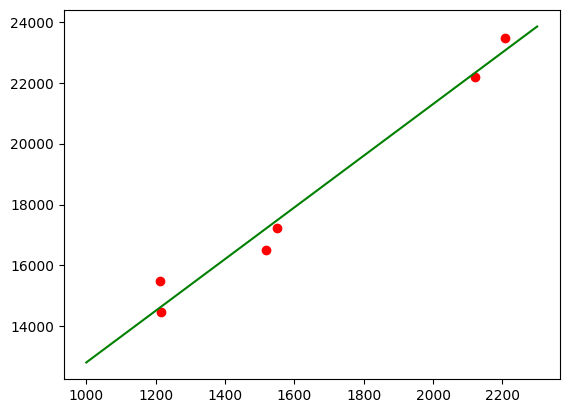

In [ ]:
# ESERCIZIO B: Usare il metodo dei minimi quadrati per determinare 
# la retta di regressione. In un plot mostrare i dati e la retta ricavata.

import matplotlib.pyplot as plt

def linear_reg(x, b0, b1):
    return b0 + b1*x

b0 = np.mean(Y) - (cov(X,Y)/var(X))*np.mean(X)
b1 = cov(X,Y)/var(X)


plt.figure()
plt.scatter(X,Y, color='red')

X_reg = list(range(1000, 2400, 100))

Y_reg = []
for x in X_reg:
    Y_reg.append(linear_reg(x, b0, b1))

plt.plot(X_reg, Y_reg, color= 'green')

plt.show()

In [91]:
# ESERCIZIO C: Calcolare il coefficiente di determinazione e commentare il risultato.

R = (cov(X,Y)**2)/(var(X)*var(Y))

if 1 - R < 0.1: 
    print(f'R = {R}, il modello è opportuno a descrivere i dati.')

R = 0.9778142064515736, il modello è opportuno a descrivere i dati.


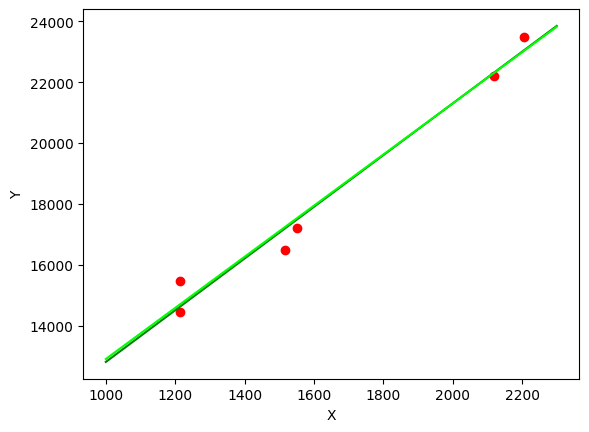

In [ ]:
# ESERCIZIO D:

nX = [1213, 1518, 3050, 852, 1550, 1215, 2120, 2207, 2175, 1128]
nY = [15474, 16497, 29349, 11314, 17224, 14459, 22186, 23483, 24095, 13982]

nb0 = np.mean(nY) - (cov(nX,nY)/var(nX))*np.mean(nX)
nb1 = cov(nX,nY)/var(nX)

nY_reg = [] 
for x in X_reg:
    nY_reg.append(linear_reg(x, nb0, nb1))


plt.scatter(X,Y, color='red')
plt.plot(X_reg, Y_reg, color= 'green')
plt.plot(X_reg, nY_reg, color= 'lime')
plt.xlabel('X')
plt.ylabel('Y')
plt.show() # i risultati sono cambiati di poco, come attestato dalla
           # sovrapposizione quasi totale delle due rette